In [1]:
from getdist import plots, MCSamples
%matplotlib inline
from matplotlib import pyplot as plt
import getdist
import numpy as np
import os
import sacc
DCOLORS = plt.rcParams['axes.prop_cycle'].by_key()['color']
color = {'gcgc': DCOLORS[0],
         'gcwl': DCOLORS[1],
         'wlwl': DCOLORS[2],
         'gcgc_gcwl_wlwl': DCOLORS[3],
         'gcgc_gcwl_wlwl_cv': DCOLORS[4]}
MP_root = '/mnt/zfsusers/gravityls_3/codes/montepython_emilio'
# sG = sacc.Sacc.load_fits('/mnt/extraspace/gravityls_3/S8z/Cls_2/4096_asDavid/cls_covG_covNG_DESgc_DESwl.fits')
sG = sacc.Sacc.load_fits('/mnt/extraspace/gravityls_3/S8z/Cls_2/4096_asDavid/cls_cov.fits')


def split_vector_array(ells, chi2):
    ells_ar = []
    chi2_ar = []

    chi2_ar_tmp = []
    ells_ar_tmp = []
    for i, l in enumerate(ells):
        if (i > 0) and (l < ells_ar_tmp[-1]):
            ells_ar.append(np.array(ells_ar_tmp))
            chi2_ar.append(np.array(chi2_ar_tmp))
            
            ells_ar_tmp = []
            chi2_ar_tmp = []

        ells_ar_tmp.append(l)
        chi2_ar_tmp.append(chi2[i])
    ells_ar.append(np.array(ells_ar_tmp))
    chi2_ar.append(np.array(chi2_ar_tmp))
    
    return ells_ar, chi2_ar

# gcgc

In [2]:
gcgc = getdist.loadMCSamples('./asDavid/cl_cross_corr_v2_gcgc-b_prior/2020-12-09_1000000_',
                           settings={'ignore_rows':0.5})
gcgc_np = getdist.loadMCSamples('./asDavid/cl_cross_corr_v2_gcgc_no-b-prior/2020-12-07_1000000_',
                           settings={'ignore_rows':0.5})
gcgc_di = np.load('./asDavid/cl_cross_corr_v2_gcgc-b_prior/cl_cross_corr_data_info.npz')
gcgc_bfi = np.load('./asDavid/cl_cross_corr_v2_gcgc-b_prior/cl_cross_corr_bestfit_info.npz')

print(gcgc.getGelmanRubin())
print(gcgc_np.getGelmanRubin())

./asDavid/cl_cross_corr_v2_gcgc-b_prior/2020-12-09_1000000__1.txt
./asDavid/cl_cross_corr_v2_gcgc-b_prior/2020-12-09_1000000__2.txt
./asDavid/cl_cross_corr_v2_gcgc-b_prior/2020-12-09_1000000__3.txt
./asDavid/cl_cross_corr_v2_gcgc-b_prior/2020-12-09_1000000__4.txt
./asDavid/cl_cross_corr_v2_gcgc-b_prior/2020-12-09_1000000__5.txt
./asDavid/cl_cross_corr_v2_gcgc-b_prior/2020-12-09_1000000__6.txt
./asDavid/cl_cross_corr_v2_gcgc-b_prior/2020-12-09_1000000__7.txt
./asDavid/cl_cross_corr_v2_gcgc-b_prior/2020-12-09_1000000__8.txt
Removed 0.5 as burn in
./asDavid/cl_cross_corr_v2_gcgc_no-b-prior/2020-12-07_1000000__1.txt
./asDavid/cl_cross_corr_v2_gcgc_no-b-prior/2020-12-07_1000000__2.txt
./asDavid/cl_cross_corr_v2_gcgc_no-b-prior/2020-12-07_1000000__3.txt
./asDavid/cl_cross_corr_v2_gcgc_no-b-prior/2020-12-07_1000000__4.txt
./asDavid/cl_cross_corr_v2_gcgc_no-b-prior/2020-12-07_1000000__5.txt
./asDavid/cl_cross_corr_v2_gcgc_no-b-prior/2020-12-07_1000000__6.txt
./asDavid/cl_cross_corr_v2_gcgc_no-

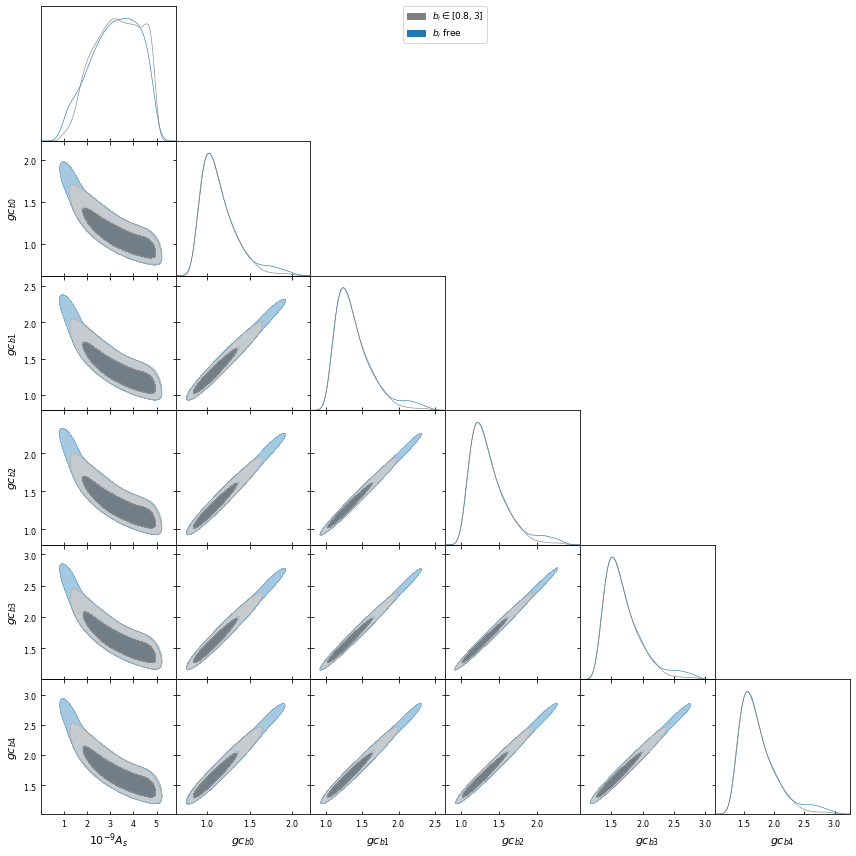

In [3]:
g = plots.get_subplot_plotter()
g.triangle_plot([gcgc_np, gcgc], ['A_s', 'gc_b_0', 'gc_b_1', 'gc_b_2', 'gc_b_3', 'gc_b_4'],
                filled=True, contour_colors=[color['gcgc'], 'gray'],
                legend_labels=['$b_i$ free', '$b_i \in [0.8, 3]$'], label_order=-1)
g.finish_plot()

# gcwl

In [4]:
gcwl = getdist.loadMCSamples('./cl_cross_corr_v2_gcwl-b_prior/2020-12-09_1000000_',
                           settings={'ignore_rows':0.5})
gcwl_np = getdist.loadMCSamples('./cl_cross_corr_v2_gcwl_no-b-prior/2020-12-07_1000000_',
                           settings={'ignore_rows':0.5})
gcwl_di = np.load('./cl_cross_corr_v2_gcwl-b_prior/cl_cross_corr_data_info.npz')
gcwl_bfi = np.load('./cl_cross_corr_v2_gcwl-b_prior/cl_cross_corr_bestfit_info.npz')

print(gcgc.getGelmanRubin())

0.08024459406966766


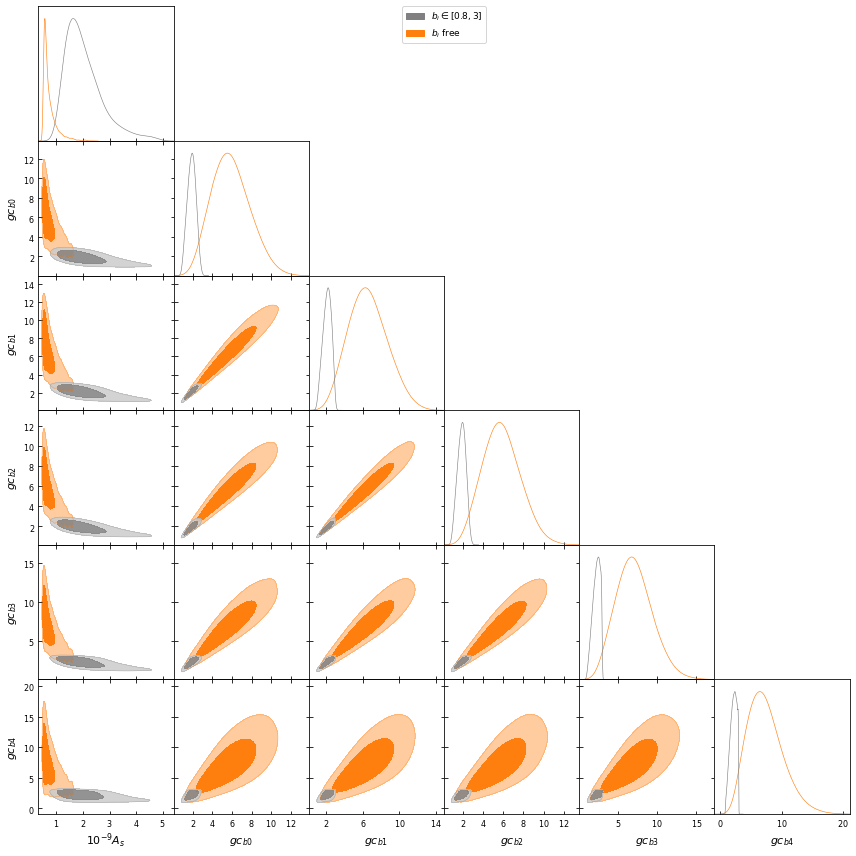

In [5]:
g = plots.get_subplot_plotter()
g.triangle_plot([gcwl_np, gcwl], ['A_s', 'gc_b_0', 'gc_b_1', 'gc_b_2', 'gc_b_3', 'gc_b_4'],
                filled=True, contour_colors=[color['gcwl'], 'gray'],
                legend_labels=['$b_i$ free', '$b_i \in [0.8, 3]$'], label_order=-1)
g.finish_plot()

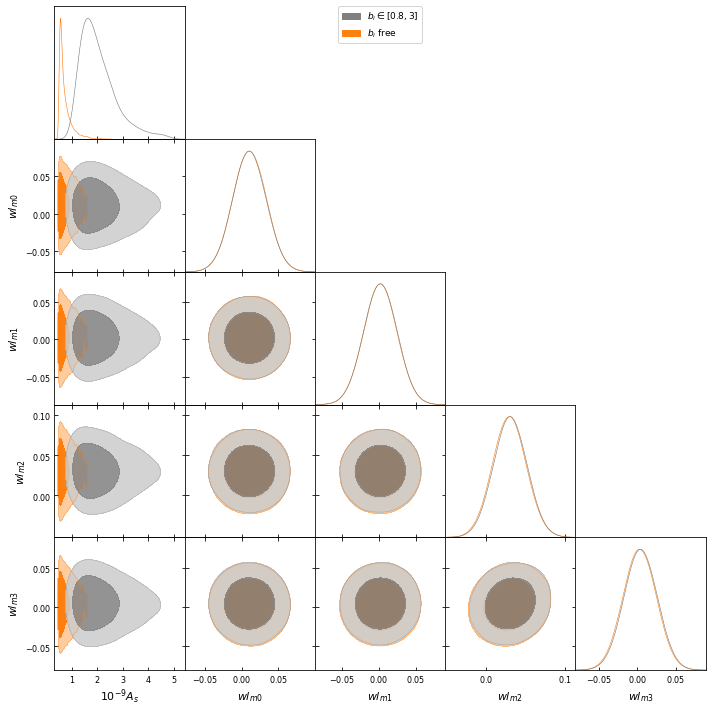

In [6]:
g = plots.get_subplot_plotter()
g.triangle_plot([gcwl_np, gcwl], ['A_s', 'wl_m_0', 'wl_m_1', 'wl_m_2', 'wl_m_3',],
                filled=True, contour_colors=[color['gcwl'], 'gray'],
                legend_labels=['$b_i$ free', '$b_i \in [0.8, 3]$'], label_order=-1)
g.finish_plot()

# wlwl

In [7]:
wlwl = getdist.loadMCSamples('./cl_cross_corr_v2_wlwl/2020-12-07_1000000_',
                           settings={'ignore_rows':0.5})
wlwl_shp = getdist.loadMCSamples('./ShearCl/cl_cross_corr_v2_lmin/2020-09-09_1000000_',
                           settings={'ignore_rows':0.5})
wlwl_di = np.load('./cl_cross_corr_v2_wlwl/cl_cross_corr_data_info.npz')
wlwl_bfi = np.load('./cl_cross_corr_v2_wlwl/cl_cross_corr_bestfit_info.npz')

print(wlwl.getGelmanRubin())
print(wlwl_shp.getGelmanRubin())

0.044523313852179974
0.07784478430069582


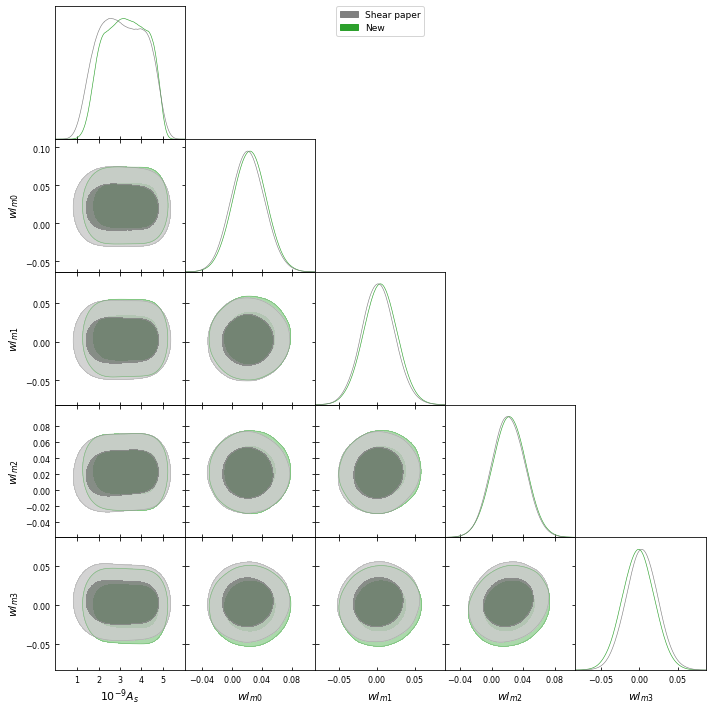

In [8]:
g = plots.get_subplot_plotter()
g.triangle_plot([wlwl, wlwl_shp], ['A_s', 'wl_m_0', 'wl_m_1', 'wl_m_2', 'wl_m_3',],
                filled=True, contour_colors=[color['wlwl'], 'gray'],
                legend_labels=['New', 'Shear paper'], label_order=-1)
g.finish_plot()

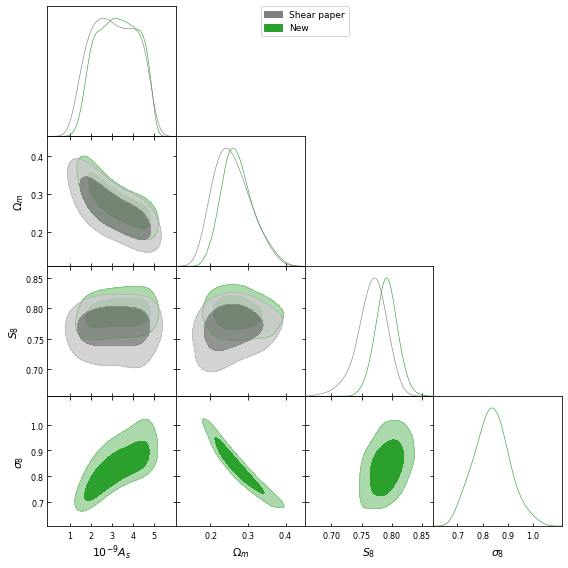

In [9]:
g = plots.get_subplot_plotter()
g.triangle_plot([wlwl, wlwl_shp], ['A_s', 'Omega_m', 'S_8', 'sigma_8'],
                filled=True, contour_colors=[color['wlwl'], 'gray'],
                legend_labels=['New', 'Shear paper'], label_order=-1)
g.finish_plot()

# gcgc - gcwl - wlwl

In [10]:
gcgc_gcwl_wlwl = getdist.loadMCSamples('./cl_cross_corr_v2_gcgc_gcwl_wlwl/2020-12-11_1000000_',
                           settings={'ignore_rows':0.25})
gcgc_gcwl_wlwl_di = np.load('./cl_cross_corr_v2_gcgc_gcwl_wlwl/cl_cross_corr_data_info.npz')
gcgc_gcwl_wlwl_bfi = np.load('./cl_cross_corr_v2_gcgc_gcwl_wlwl/cl_cross_corr_bestfit_info.npz')

print(gcgc_gcwl_wlwl.getGelmanRubin())

0.022661560841834752


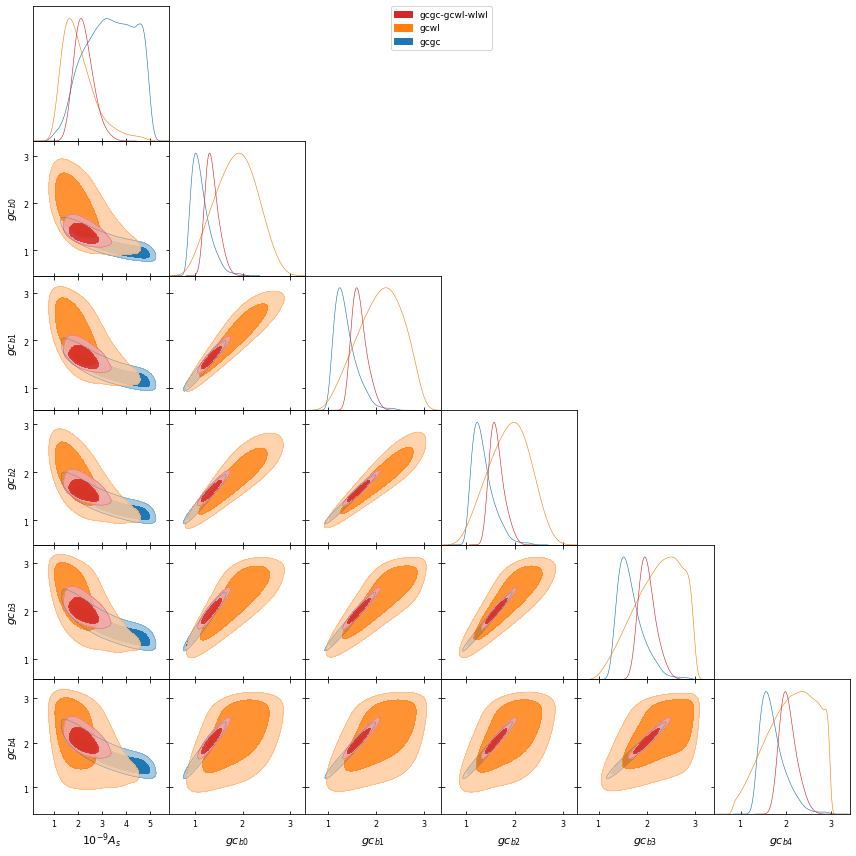

In [11]:
g = plots.get_subplot_plotter()
g.triangle_plot([gcgc, gcwl, gcgc_gcwl_wlwl], ['A_s', 'gc_b_0', 'gc_b_1', 'gc_b_2', 'gc_b_3', 'gc_b_4'],
                filled=True, contour_colors=[color['gcgc'], color['gcwl'], color['gcgc_gcwl_wlwl']],
                legend_labels=['gcgc', 'gcwl', 'gcgc-gcwl-wlwl'], label_order=-1)
g.finish_plot()

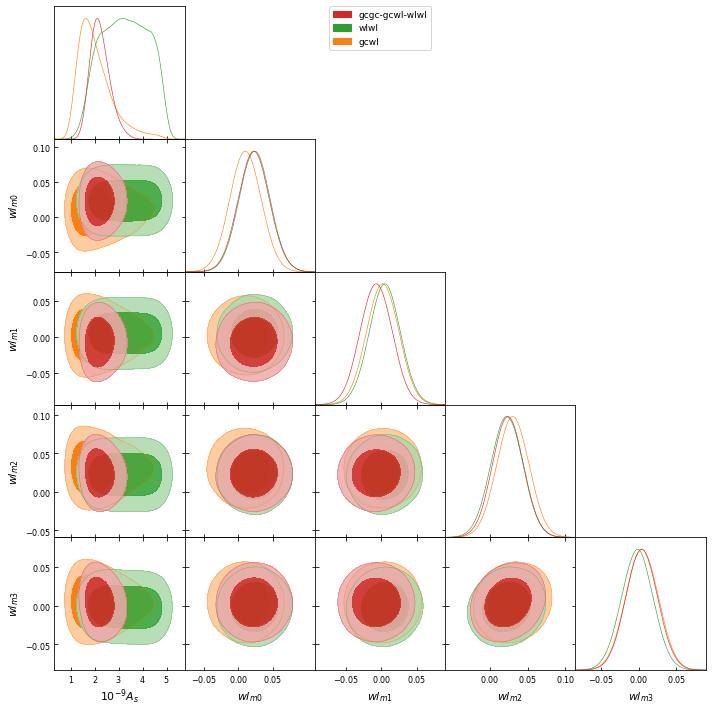

In [12]:
g = plots.get_subplot_plotter()
g.triangle_plot([gcwl, wlwl, gcgc_gcwl_wlwl], ['A_s', 'wl_m_0', 'wl_m_1', 'wl_m_2', 'wl_m_3',],
                filled=True, contour_colors=[color['gcwl'], color['wlwl'], color['gcgc_gcwl_wlwl']],
                legend_labels=['gcwl', 'wlwl', 'gcgc-gcwl-wlwl'], label_order=-1)
g.finish_plot()

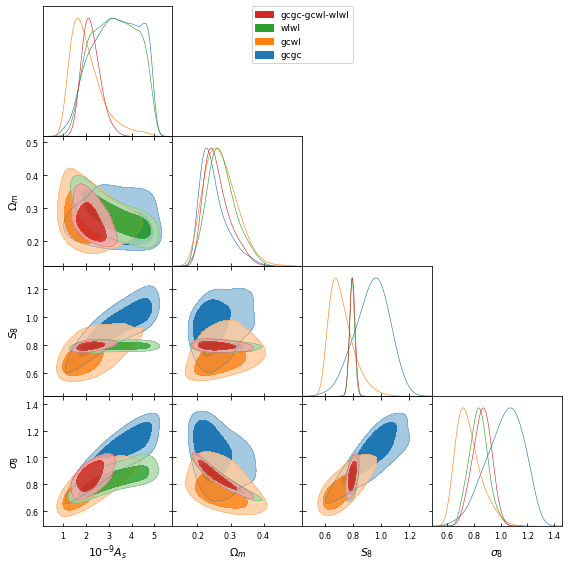

In [13]:
g = plots.get_subplot_plotter()
g.triangle_plot([gcgc, gcwl, wlwl, gcgc_gcwl_wlwl], ['A_s', 'Omega_m', 'S_8', 'sigma_8'],
                filled=True, contour_colors=[color['gcgc'], color['gcwl'], color['wlwl'], color['gcgc_gcwl_wlwl']],
                legend_labels=['gcgc', 'gcwl', 'wlwl', 'gcgc-gcwl-wlwl'], label_order=-1)
g.finish_plot()

# gcgc - gcwl - wlwl - cv

In [14]:
gcgc_gcwl_wlwl_cv = getdist.loadMCSamples('./cl_cross_corr_v2_gcgc_gcwl_wlwl_cv/2020-12-18_1000000_',
                                         settings={'ignore_rows':0.3})
gcgc_gcwl_wlwl_cv_di = np.load('./cl_cross_corr_v2_gcgc_gcwl_wlwl_cv/cl_cross_corr_data_info.npz')
gcgc_gcwl_wlwl_cv_bfi = np.load('./cl_cross_corr_v2_gcgc_gcwl_wlwl_cv/cl_cross_corr_bestfit_info.npz')

print(gcgc_gcwl_wlwl_cv.getGelmanRubin())

./cl_cross_corr_v2_gcgc_gcwl_wlwl_cv/2020-12-18_1000000__1.txt
./cl_cross_corr_v2_gcgc_gcwl_wlwl_cv/2020-12-18_1000000__2.txt
./cl_cross_corr_v2_gcgc_gcwl_wlwl_cv/2020-12-18_1000000__3.txt
./cl_cross_corr_v2_gcgc_gcwl_wlwl_cv/2020-12-18_1000000__4.txt
./cl_cross_corr_v2_gcgc_gcwl_wlwl_cv/2020-12-18_1000000__5.txt
./cl_cross_corr_v2_gcgc_gcwl_wlwl_cv/2020-12-18_1000000__6.txt
./cl_cross_corr_v2_gcgc_gcwl_wlwl_cv/2020-12-18_1000000__7.txt
./cl_cross_corr_v2_gcgc_gcwl_wlwl_cv/2020-12-18_1000000__8.txt
Removed 0.3 as burn in
0.08660491474140729


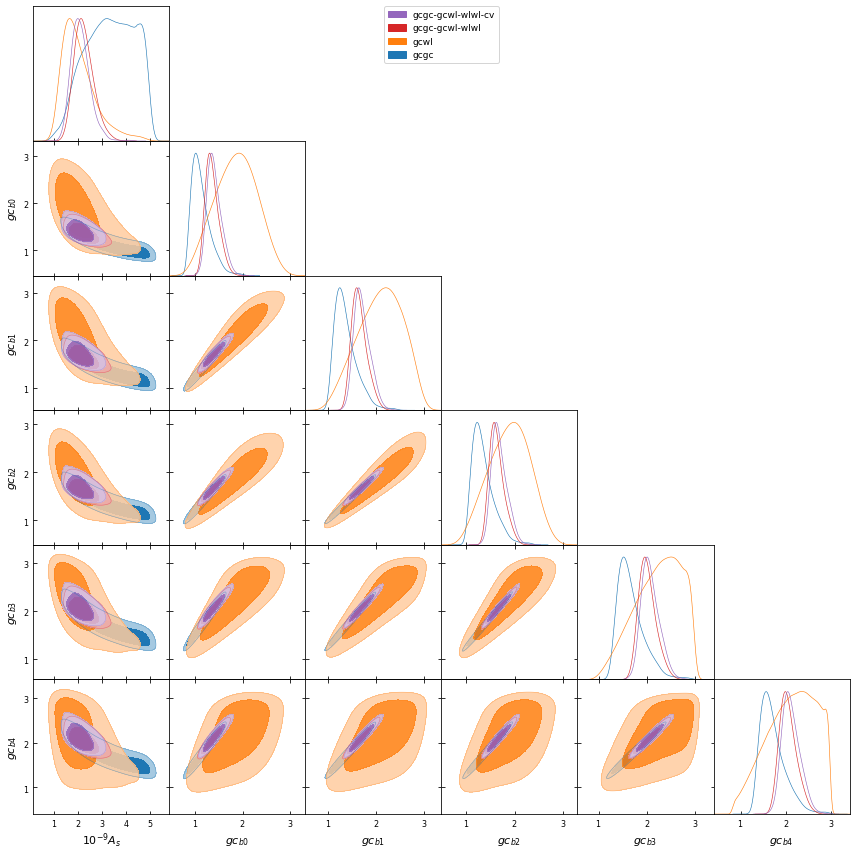

In [15]:
g = plots.get_subplot_plotter()
g.triangle_plot([gcgc, gcwl, gcgc_gcwl_wlwl, gcgc_gcwl_wlwl_cv], ['A_s', 'gc_b_0', 'gc_b_1', 'gc_b_2', 'gc_b_3', 'gc_b_4'],
                filled=True, contour_colors=[color['gcgc'], color['gcwl'], color['gcgc_gcwl_wlwl'], color['gcgc_gcwl_wlwl_cv']],
                legend_labels=['gcgc', 'gcwl', 'gcgc-gcwl-wlwl', 'gcgc-gcwl-wlwl-cv'], label_order=-1)
g.finish_plot()

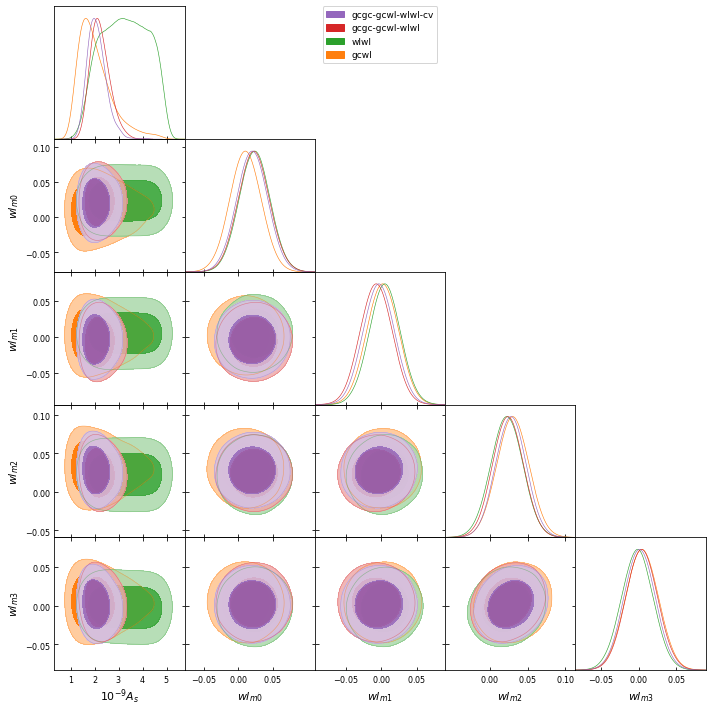

In [16]:
g = plots.get_subplot_plotter()
g.triangle_plot([gcwl, wlwl, gcgc_gcwl_wlwl, gcgc_gcwl_wlwl_cv], ['A_s', 'wl_m_0', 'wl_m_1', 'wl_m_2', 'wl_m_3',],
                filled=True, contour_colors=[color['gcwl'], color['wlwl'], color['gcgc_gcwl_wlwl'], color['gcgc_gcwl_wlwl_cv']],
                legend_labels=['gcwl', 'wlwl', 'gcgc-gcwl-wlwl', 'gcgc-gcwl-wlwl-cv'], label_order=-1)
g.finish_plot()

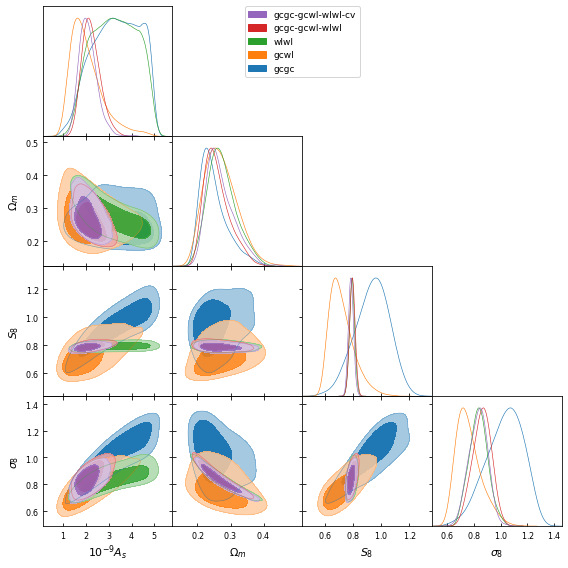

In [17]:
g = plots.get_subplot_plotter()
g.triangle_plot([gcgc, gcwl, wlwl, gcgc_gcwl_wlwl, gcgc_gcwl_wlwl_cv], ['A_s', 'Omega_m', 'S_8', 'sigma_8'],
                filled=True, contour_colors=[color['gcgc'], color['gcwl'], color['wlwl'], color['gcgc_gcwl_wlwl'], color['gcgc_gcwl_wlwl_cv']],
                legend_labels=['gcgc', 'gcwl', 'wlwl', 'gcgc-gcwl-wlwl', 'gcgc-gcwl-wlwl-cv'], label_order=-1)
g.finish_plot()

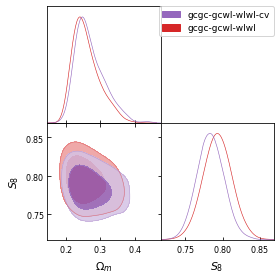

In [43]:
# More or less the same as Fig. 2 in 1810.02322 (DES paper)
g = plots.get_subplot_plotter()
g.triangle_plot([gcgc_gcwl_wlwl, gcgc_gcwl_wlwl_cv], ['Omega_m', 'S_8'],
          filled=True,
          contour_colors=[color['gcgc_gcwl_wlwl'], color['gcgc_gcwl_wlwl_cv']],
          legend_labels=['gcgc-gcwl-wlwl', 'gcgc-gcwl-wlwl-cv'], label_order=-1)
g.finish_plot()

In [18]:
for i in ['Omega_m', 'sigma_8', 'S_8']:
    print(gcgc_gcwl_wlwl_cv.getInlineLatex(i, limit=1))

\Omega_{m } = 0.270^{+0.027}_{-0.052}
\sigma_{8 } = 0.834^{+0.075}_{-0.068}
S_{8 } = 0.784\pm 0.018


# $\chi^2$'s

In [19]:
from texttable import Texttable
import scipy.stats

names = ['gcgc', 'gcwl', 'wlwl', 'gcgc_gcwl_wlwl', 'gcgc_gcwl_wlwl_cv']
chains = [gcgc, gcwl, wlwl, gcgc_gcwl_wlwl, gcgc_gcwl_wlwl_cv]
di = [gcgc_di, gcwl_di, wlwl_di, gcgc_gcwl_wlwl_di, gcgc_gcwl_wlwl_cv_di]
bfi = [gcgc_bfi, gcwl_bfi, wlwl_bfi, gcgc_gcwl_wlwl_bfi, gcgc_gcwl_wlwl_cv_bfi]
t = Texttable()
t.add_row(['', 'params', 'data points', 'chi2_wp', 'chi2', 'PTE', 'PTE (d-p)'])
for n, c, b, d in zip(names, chains, bfi, di):
    dof = d['ells'].size
    vp = dof - d['dof']
    chi2_c = 2 * c.loglikes.min()
    chi2 = b['chi2_nolp']
    pte = 1 - scipy.stats.chi2.cdf(chi2, dof)
    pte2 = 1 - scipy.stats.chi2.cdf(chi2, dof - vp)
    t.add_row([n, vp, dof, chi2_c, chi2, pte, pte2])
print(t.draw())

+---------------+--------+-------------+---------+---------+-------+-----------+
|               | params | data points | chi2_wp | chi2    | PTE   | PTE (d-p) |
+---------------+--------+-------------+---------+---------+-------+-----------+
| gcgc          | 15     | 47          | 58.698  | 58.439  | 0.122 | 0.003     |
+---------------+--------+-------------+---------+---------+-------+-----------+
| gcwl          | 25     | 188         | 227.018 | 219.403 | 0.058 | 0.002     |
+---------------+--------+-------------+---------+---------+-------+-----------+
| wlwl          | 15     | 240         | 241.716 | 237.958 | 0.525 | 0.264     |
+---------------+--------+-------------+---------+---------+-------+-----------+
| gcgc_gcwl_wlw | 25     | 475         | 484.716 | 470.553 | 0.549 | 0.243     |
| l             |        |             |         |         |       |           |
+---------------+--------+-------------+---------+---------+-------+-----------+
| gcgc_gcwl_wlw | 25     | 6

## gcgc

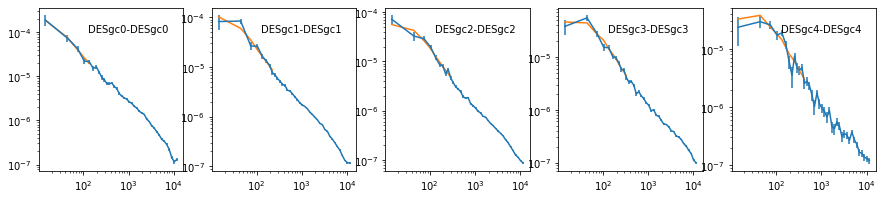

In [3]:
info = gcgc_di
bf = gcgc_bfi

ells_bf_ar, cls_bf_ar = split_vector_array(info['ells'], bf['cls'])
f, axs = plt.subplots(1, 5, figsize=(15, 3))
ax = axs.reshape((-1))
for i, trs in enumerate(info['tracers']):
    tr1, tr2 = trs
    ell, cl, cov = sG.get_ell_cl('cl_00', tr1, tr2, return_cov=True)
    err = np.sqrt(np.diag(cov))
    ax[i].errorbar(ell, cl, yerr=err)
    ax[i].loglog(ells_bf_ar[i], cls_bf_ar[i])
    ax[i].text(0.9, 0.9, tr1+'-'+tr2, horizontalalignment='right', 
               verticalalignment='top', transform=ax[i].transAxes)
plt.show()
plt.close()

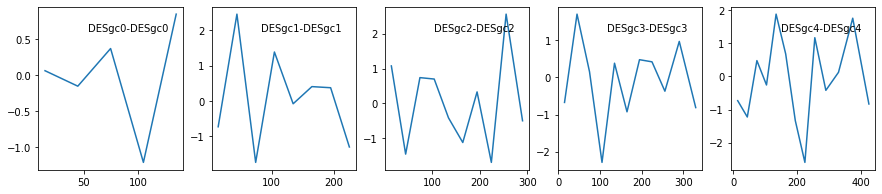

In [4]:
info = gcgc_di
bf = gcgc_bfi
    
ells_bf_ar, cls_bf_ar = split_vector_array(info['ells'], bf['cls'])
f, axs = plt.subplots(1, 5, figsize=(15, 3))
ax = axs.reshape((-1))
for i, trs in enumerate(info['tracers']):
    tr1, tr2 = trs
    ell, cl, cov = sG.get_ell_cl('cl_00', tr1, tr2, return_cov=True)
    err = np.sqrt(np.diag(cov))
    ell = ells_bf_ar[i]
    cl = cl[:ell.size]
    err = err[:ell.size]
    ax[i].plot(ells_bf_ar[i], (cl - cls_bf_ar[i]) / err)
    ax[i].text(0.9, 0.9, tr1+'-'+tr2, horizontalalignment='right', 
               verticalalignment='top', transform=ax[i].transAxes)
plt.show()
plt.close()

## gcwl

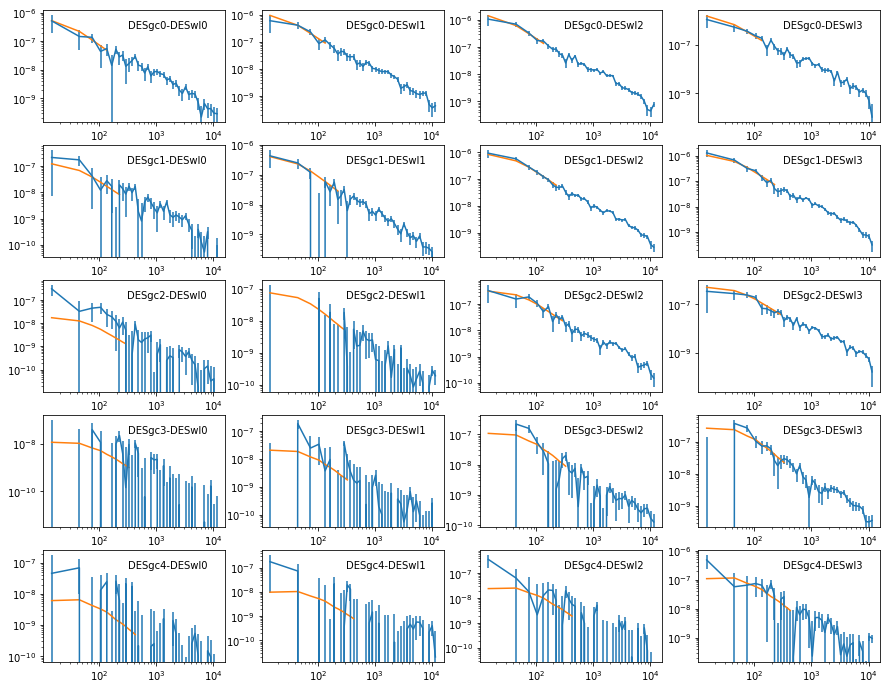

In [20]:
info = gcwl_di
bf = gcwl_bfi

ells_bf_ar, cls_bf_ar = split_vector_array(info['ells'], bf['cls'])
f, axs = plt.subplots(5, 4, figsize=(15, 12))
ax = axs.reshape((-1))
for i, trs in enumerate(info['tracers']):
    tr1, tr2 = trs
    ell, cl, cov = sG.get_ell_cl('cl_0e', tr1, tr2, return_cov=True)
    err = np.sqrt(np.diag(cov))
    ax[i].errorbar(ell, cl, yerr=err)
    ax[i].loglog(ells_bf_ar[i], cls_bf_ar[i])
    ax[i].text(0.9, 0.9, tr1+'-'+tr2, horizontalalignment='right', 
               verticalalignment='top', transform=ax[i].transAxes)
plt.show()
plt.close()
    

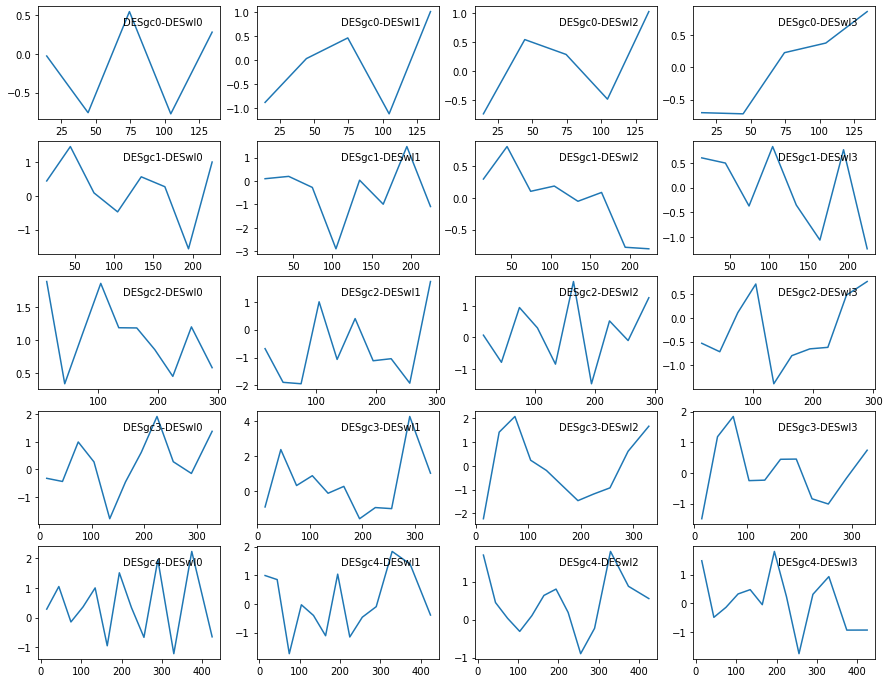

In [21]:
info = gcwl_di
bf = gcwl_bfi

ells_bf_ar, cls_bf_ar = split_vector_array(info['ells'], bf['cls'])
f, axs = plt.subplots(5, 4, figsize=(15, 12))
ax = axs.reshape((-1))
for i, trs in enumerate(info['tracers']):
    tr1, tr2 = trs
    ell, cl, cov = sG.get_ell_cl('cl_0e', tr1, tr2, return_cov=True)
    err = np.sqrt(np.diag(cov))
    ell = ells_bf_ar[i]
    cl = cl[:ell.size]
    err = err[:ell.size]
    ax[i].plot(ells_bf_ar[i], (cl - cls_bf_ar[i]) / err)
    ax[i].text(0.9, 0.9, tr1+'-'+tr2, horizontalalignment='right', 
               verticalalignment='top', transform=ax[i].transAxes)
plt.show()
plt.close()
    

## gcgc_gcwl_wlwl_cv

### $C_\ell$'s

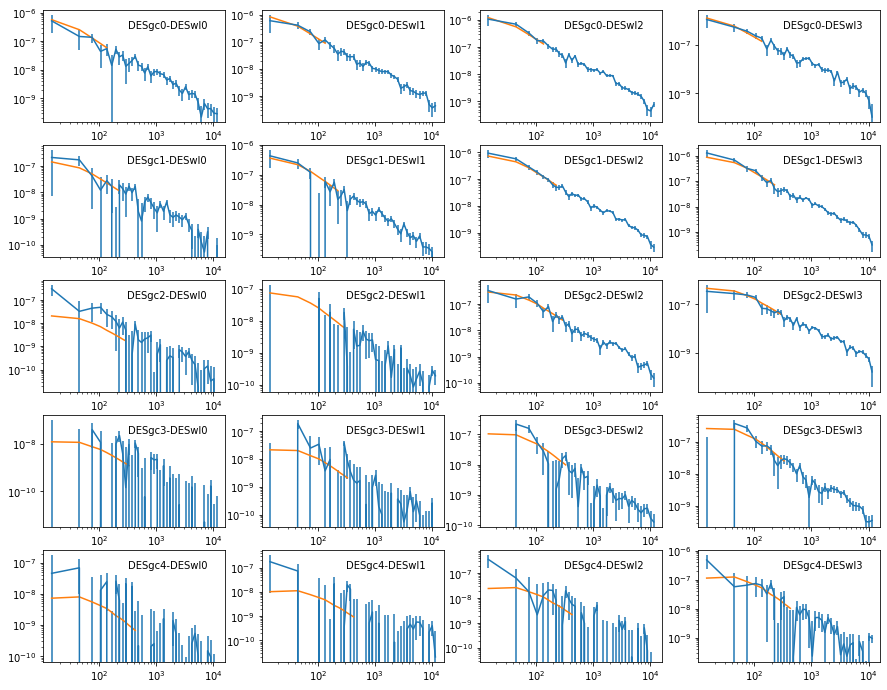

In [22]:
info = gcgc_gcwl_wlwl_cv_di
bf = gcgc_gcwl_wlwl_cv_bfi

ells_bf_ar, cls_bf_ar = split_vector_array(info['ells'], bf['cls'])
f, axs = plt.subplots(5, 4, figsize=(15, 12))
ax = axs.reshape((-1))
ix = 0
for i, trs in enumerate(info['tracers']):
    tr1, tr2 = trs
    if ('gc' not in tr1) or ('wl' not in tr2):
        continue
    ell, cl, cov = sG.get_ell_cl('cl_0e', tr1, tr2, return_cov=True)
    err = np.sqrt(np.diag(cov))
    ax[ix].errorbar(ell, cl, yerr=err)
    ax[ix].loglog(ells_bf_ar[i], cls_bf_ar[i])
    ax[ix].text(0.9, 0.9, tr1+'-'+tr2, horizontalalignment='right', 
               verticalalignment='top', transform=ax[ix].transAxes)
    ix += 1
plt.show()
plt.close()
    

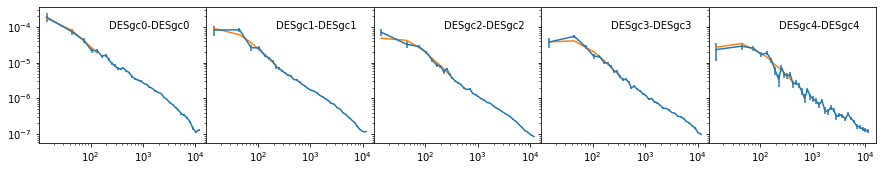

In [23]:
info = gcgc_gcwl_wlwl_cv_di
bf = gcgc_gcwl_wlwl_cv_bfi

ells_bf_ar, cls_bf_ar = split_vector_array(info['ells'], bf['cls'])
f, axs = plt.subplots(1, 5, figsize=(15, 2.5), gridspec_kw={'wspace': 0}, sharey=True)
ax = axs.reshape((-1))
ix = 0
for i, trs in enumerate(info['tracers']):
    tr1, tr2 = trs
    if ('gc' not in tr1) or ('gc' not in tr2):
        continue
    ell, cl, cov = sG.get_ell_cl('cl_00', tr1, tr2, return_cov=True)
    err = np.sqrt(np.diag(cov))
    ax[ix].errorbar(ell, cl, yerr=err)
    ax[ix].loglog(ells_bf_ar[i], cls_bf_ar[i])
    ax[ix].text(0.9, 0.9, tr1+'-'+tr2, horizontalalignment='right', 
               verticalalignment='top', transform=ax[ix].transAxes)
    ix += 1
plt.show()
plt.close()
    

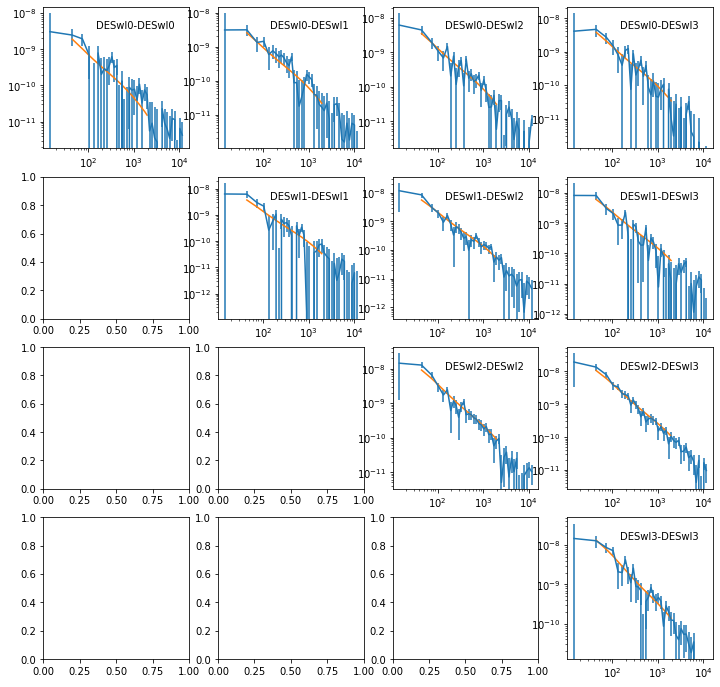

In [24]:
info = gcgc_gcwl_wlwl_cv_di
bf = gcgc_gcwl_wlwl_cv_bfi

ells_bf_ar, cls_bf_ar = split_vector_array(info['ells'], bf['cls'])
f, axs = plt.subplots(4, 4, figsize=(12, 12))
ax = axs
for i, trs in enumerate(info['tracers']):
    tr1, tr2 = trs
    if ('wl' not in tr1) or ('wl' not in tr2):
        continue
    ix = (int(tr1[-1]), int(tr2[-1]))
    ell, cl, cov = sG.get_ell_cl('cl_ee', tr1, tr2, return_cov=True)
    err = np.sqrt(np.diag(cov))
    ax[ix].errorbar(ell, cl, yerr=err)
    ax[ix].loglog(ells_bf_ar[i], cls_bf_ar[i])
    ax[ix].text(0.9, 0.9, tr1+'-'+tr2, horizontalalignment='right', 
               verticalalignment='top', transform=ax[ix].transAxes)
plt.show()
plt.close()
    

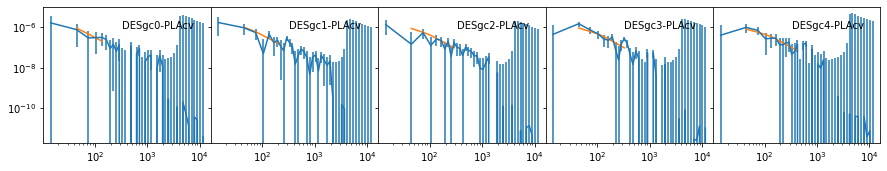

In [25]:
info = gcgc_gcwl_wlwl_cv_di
bf = gcgc_gcwl_wlwl_cv_bfi

ells_bf_ar, cls_bf_ar = split_vector_array(info['ells'], bf['cls'])
f, axs = plt.subplots(1, 5, figsize=(15, 2.5), gridspec_kw={'wspace': 0}, sharey=True)
ax = axs.reshape((-1))
ix = 0
for i, trs in enumerate(info['tracers']):
    tr1, tr2 = trs
    if ('gc' not in tr1) or ('cv' not in tr2):
        continue
    ell, cl, cov = sG.get_ell_cl('cl_00', tr1, tr2, return_cov=True)
    err = np.sqrt(np.diag(cov))
    ax[ix].errorbar(ell, cl, yerr=err)
    ax[ix].loglog(ells_bf_ar[i], cls_bf_ar[i])
    ax[ix].text(0.9, 0.9, tr1+'-'+tr2, horizontalalignment='right', 
               verticalalignment='top', transform=ax[ix].transAxes)
    ix += 1
plt.show()
plt.close()
    

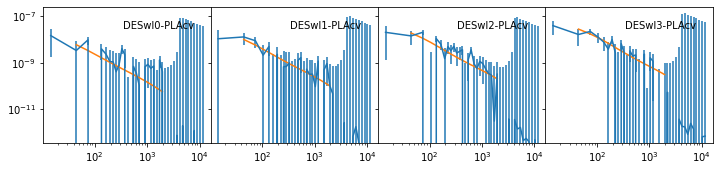

In [26]:
info = gcgc_gcwl_wlwl_cv_di
bf = gcgc_gcwl_wlwl_cv_bfi

ells_bf_ar, cls_bf_ar = split_vector_array(info['ells'], bf['cls'])
f, axs = plt.subplots(1, 4, figsize=(12, 2.5), gridspec_kw={'wspace': 0}, sharey=True)
ax = axs.reshape((-1))
ix = 0
for i, trs in enumerate(info['tracers']):
    tr1, tr2 = trs
    if ('wl' not in tr1) or ('cv' not in tr2):
        continue
    ell, cl, cov = sG.get_ell_cl('cl_0e', tr1, tr2, return_cov=True)
    err = np.sqrt(np.diag(cov))
    ax[ix].errorbar(ell, cl, yerr=err)
    ax[ix].loglog(ells_bf_ar[i], cls_bf_ar[i])
    ax[ix].text(0.9, 0.9, tr1+'-'+tr2, horizontalalignment='right', 
               verticalalignment='top', transform=ax[ix].transAxes)
    ix += 1
plt.show()
plt.close()
    

### $\chi^2$'s

In [27]:
info = gcgc_gcwl_wlwl_cv_di
bf = gcgc_gcwl_wlwl_cv_bfi
(info['cls'] - bf['cls']).dot(np.linalg.inv(info['cov'])).dot(info['cls'] - bf['cls'])

626.2206753295637

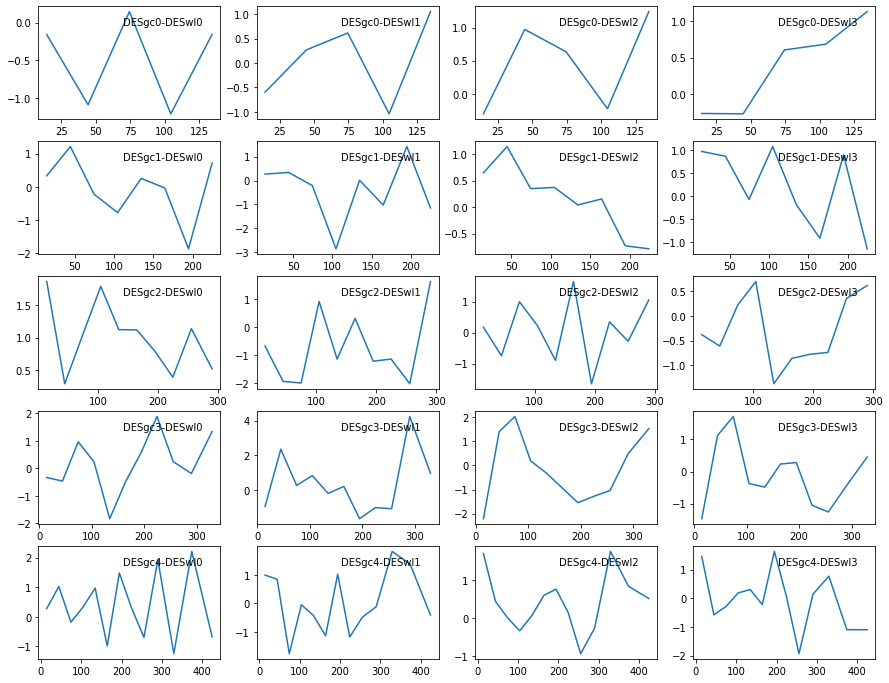

In [28]:
info = gcgc_gcwl_wlwl_cv_di
bf = gcgc_gcwl_wlwl_cv_bfi

ells_bf_ar, cls_bf_ar = split_vector_array(info['ells'], bf['cls'])
f, axs = plt.subplots(5, 4, figsize=(15, 12))
ax = axs.reshape((-1))
ix = 0
for i, trs in enumerate(info['tracers']):
    tr1, tr2 = trs
    if ('gc' not in tr1) or ('wl' not in tr2):
        continue
    ell, cl, cov = sG.get_ell_cl('cl_0e', tr1, tr2, return_cov=True)
    err = np.sqrt(np.diag(cov))
    ell = ells_bf_ar[i]
    cl = cl[:ell.size]
    err = err[:ell.size]
    ax[ix].plot(ells_bf_ar[i], (cl - cls_bf_ar[i]) / err)
    ax[ix].text(0.9, 0.9, tr1+'-'+tr2, horizontalalignment='right', 
               verticalalignment='top', transform=ax[ix].transAxes)
    ix += 1
plt.show()
plt.close()
    

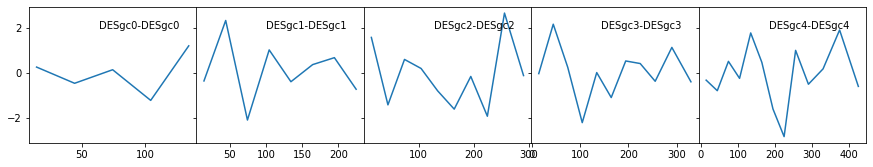

In [29]:
info = gcgc_gcwl_wlwl_cv_di
bf = gcgc_gcwl_wlwl_cv_bfi

ells_bf_ar, cls_bf_ar = split_vector_array(info['ells'], bf['cls'])
f, axs = plt.subplots(1, 5, figsize=(15, 2.5), gridspec_kw={'wspace': 0}, sharey=True)
ax = axs.reshape((-1))
ix = 0
for i, trs in enumerate(info['tracers']):
    tr1, tr2 = trs
    if ('gc' not in tr1) or ('gc' not in tr2):
        continue
    ell, cl, cov = sG.get_ell_cl('cl_00', tr1, tr2, return_cov=True)
    err = np.sqrt(np.diag(cov))
    ell = ells_bf_ar[i]
    cl = cl[:ell.size]
    err = err[:ell.size]
    ax[ix].plot(ells_bf_ar[i], (cl - cls_bf_ar[i]) / err)
    ax[ix].text(0.9, 0.9, tr1+'-'+tr2, horizontalalignment='right', 
               verticalalignment='top', transform=ax[ix].transAxes)
    ix += 1
plt.show()
plt.close()
    

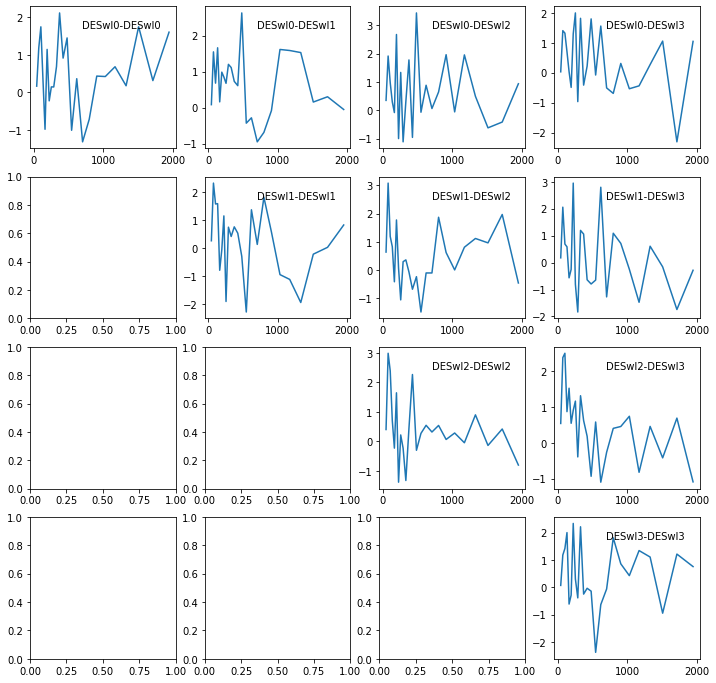

In [30]:
info = gcgc_gcwl_wlwl_cv_di
bf = gcgc_gcwl_wlwl_cv_bfi

ells_bf_ar, cls_bf_ar = split_vector_array(info['ells'], bf['cls'])
f, axs = plt.subplots(4, 4, figsize=(12, 12))
ax = axs
for i, trs in enumerate(info['tracers']):
    tr1, tr2 = trs
    if ('wl' not in tr1) or ('wl' not in tr2):
        continue
    ix = (int(tr1[-1]), int(tr2[-1]))
    ell, cl, cov = sG.get_ell_cl('cl_ee', tr1, tr2, return_cov=True)
    err = np.sqrt(np.diag(cov))
    ell = ells_bf_ar[i]
    cl = cl[:ell.size]
    err = err[:ell.size]
    ax[ix].plot(ells_bf_ar[i], (cl - cls_bf_ar[i]) / err)
    ax[ix].text(0.9, 0.9, tr1+'-'+tr2, horizontalalignment='right', 
               verticalalignment='top', transform=ax[ix].transAxes)
plt.show()
plt.close()
    

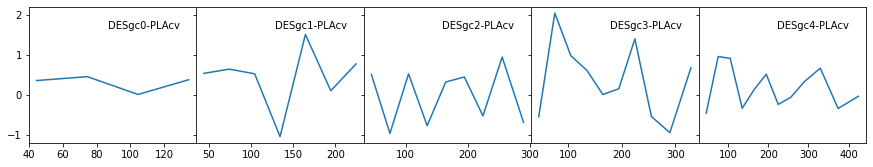

In [31]:
info = gcgc_gcwl_wlwl_cv_di
bf = gcgc_gcwl_wlwl_cv_bfi

ells_bf_ar, cls_bf_ar = split_vector_array(info['ells'], bf['cls'])
f, axs = plt.subplots(1, 5, figsize=(15, 2.5), gridspec_kw={'wspace': 0}, sharey=True)
ax = axs.reshape((-1))
ix = 0
for i, trs in enumerate(info['tracers']):
    tr1, tr2 = trs
    if ('gc' not in tr1) or ('cv' not in tr2):
        continue
    ell, cl, cov = sG.get_ell_cl('cl_00', tr1, tr2, return_cov=True)
    err = np.sqrt(np.diag(cov))
    ell = ells_bf_ar[i]
    cl = cl[:ell.size]
    err = err[:ell.size]
    ax[ix].plot(ells_bf_ar[i], (cl - cls_bf_ar[i]) / err)
    ax[ix].text(0.9, 0.9, tr1+'-'+tr2, horizontalalignment='right', 
               verticalalignment='top', transform=ax[ix].transAxes)
    ix += 1
plt.show()
plt.close()
    

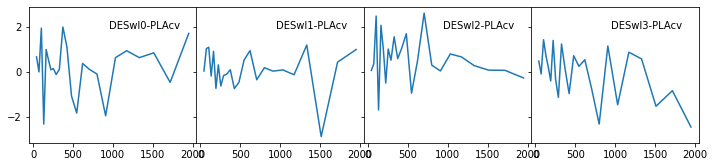

In [32]:
info = gcgc_gcwl_wlwl_cv_di
bf = gcgc_gcwl_wlwl_cv_bfi

ells_bf_ar, cls_bf_ar = split_vector_array(info['ells'], bf['cls'])
f, axs = plt.subplots(1, 4, figsize=(12, 2.5), gridspec_kw={'wspace': 0}, sharey=True)
ax = axs.reshape((-1))
ix = 0
for i, trs in enumerate(info['tracers']):
    tr1, tr2 = trs
    if ('wl' not in tr1) or ('cv' not in tr2):
        continue
    ell, cl, cov = sG.get_ell_cl('cl_0e', tr1, tr2, return_cov=True)
    err = np.sqrt(np.diag(cov))
    ell = ells_bf_ar[i]
    cl = cl[:ell.size]
    err = err[:ell.size]
    ax[ix].plot(ells_bf_ar[i], (cl - cls_bf_ar[i]) / err)
    ax[ix].text(0.9, 0.9, tr1+'-'+tr2, horizontalalignment='right', 
               verticalalignment='top', transform=ax[ix].transAxes)
    ix += 1
plt.show()
plt.close()
    